In [12]:
import numpy as np
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
class LinearThresholdModel:
    def __init__(self, num_nodes, threshold):
        self.num_nodes = num_nodes
        self.threshold = threshold
        self.weights = np.zeros((num_nodes, num_nodes))
        self.activation = np.zeros(num_nodes)

    def set_connections(self, connections):
        self.weights = np.array(connections)

    def reset_activation(self):
        self.activation = np.zeros(self.num_nodes)

    def update_activation(self):
        new_activation = np.dot(self.weights, self.activation)
        self.activation = np.where(new_activation >= self.threshold, 1, 0)

    def run_model(self, num_iterations, seeds):
        results = []
        for _ in range(num_iterations):
            self.reset_activation()
            self.activation[seeds] = 1  # Activate the seed nodes simultaneously
            for _ in range(num_iterations):
                self.update_activation()
            results.append(self.activation.copy())
        return np.array(results)

In [14]:
# Function to read connectivity matrix from CSV file
def read_connectivity_matrix(file_path):
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        connectivity_matrix = []
        for row in reader:
            connectivity_matrix.append([float(val) for val in row])
    return connectivity_matrix

"""# Function to create and visualize a graph with a brain-like figure
def visualize_graph(connectivity_matrix, activation):
    G = nx.Graph()
    num_nodes = len(connectivity_matrix)
    
    # Add nodes to the graph
    for i in range(num_nodes):
        G.add_node(i, activation=activation[i])

    # Add edges to the graph
    for i in range(num_nodes):
        for j in range(num_nodes):
            if connectivity_matrix[i][j] > 0:
                G.add_edge(i, j)

    # Draw the graph with custom node shapes
    pos = nx.circular_layout(G)
    node_shapes = ['o' if G.nodes[i]['activation'] == 1 else '^' for i in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=['r' if G.nodes[i]['activation'] == 1 else 'b' for i in G.nodes], node_shape=node_shapes)
    plt.show()"""
def visualize_graph(connectivity_matrix, activation):
    G = nx.Graph()
    num_nodes = len(connectivity_matrix)
    
    # Add nodes to the graph
    for i in range(num_nodes):
        G.add_node(i, activation=activation[i])

    # Add edges to the graph
    for i in range(num_nodes):
        for j in range(num_nodes):
            if connectivity_matrix[i][j] > 0:
                G.add_edge(i, j)

    # Draw the graph with custom node shapes
    pos = nx.circular_layout(G)
    node_colors = ['r' if G.nodes[i]['activation'] == 1 else 'b' for i in G.nodes]
    activated_nodes = [node for node, act in G.nodes(data='activation') if act == 1]
    non_activated_nodes = [node for node, act in G.nodes(data='activation') if act == 0]
    
    nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes, node_color='r', node_shape='o', node_size=300, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=non_activated_nodes, node_color='b', node_shape='^', node_size=300, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    plt.show()


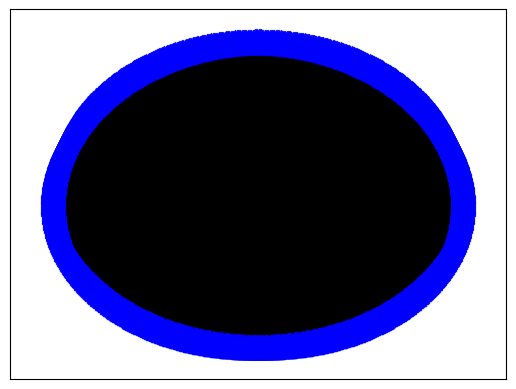

In [20]:
# Example usage:
if __name__ == "__main__":
    # Define the number of nodes and threshold
    num_nodes = 1054
    threshold = 0.5

    # Read the connectivity matrix from CSV file
    connectivity_matrix = read_connectivity_matrix('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv')

    # Create an instance of the linear threshold model
    ltm = LinearThresholdModel(num_nodes, threshold)

    # Set the connections using the connectivity matrix
    ltm.set_connections(connectivity_matrix)

    # Define seeds for the competitive scenario
    seed1 = 5
    seed2 = 2

    # Run the model for 10,000 iterations with two different seeds
    num_iterations = 1
    results_seed1 = ltm.run_model(num_iterations, seeds=[seed1])
    results_seed2 = ltm.run_model(num_iterations, seeds=[seed2])

    # Calculate the number of times each node was activated for each seed
    activations_seed1 = np.sum(results_seed1, axis=0)
    activations_seed2 = np.sum(results_seed2, axis=0)

    # Visualize the graph with activation states
    visualize_graph(connectivity_matrix, activations_seed1)

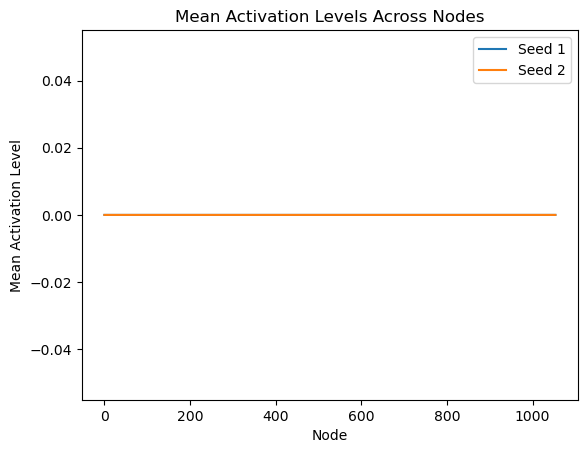

In [18]:
import numpy as np
import csv
import matplotlib.pyplot as plt

class LinearThresholdModel:
    def __init__(self, num_nodes, threshold):
        self.num_nodes = num_nodes
        self.threshold = threshold
        self.weights = np.zeros((num_nodes, num_nodes))
        self.activation = np.zeros(num_nodes)

    def set_connections(self, connections):
        self.weights = np.array(connections)

    def reset_activation(self):
        self.activation = np.zeros(self.num_nodes)

    def update_activation(self):
        new_activation = np.dot(self.weights, self.activation)
        self.activation = np.where(new_activation >= self.threshold, 1, 0)

    def run_model(self, num_iterations, seeds):
        results = []
        for _ in range(num_iterations):
            self.reset_activation()
            self.activation[seeds] = 1  # Activate the seed nodes simultaneously
            for _ in range(num_iterations):
                self.update_activation()
            results.append(self.activation.copy())
        return np.array(results)

# Function to read connectivity matrix from CSV file
def read_connectivity_matrix(file_path):
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        connectivity_matrix = []
        for row in reader:
            connectivity_matrix.append([float(val) for val in row])
    return connectivity_matrix

# Example usage:
if __name__ == "__main__":
    # Define the number of nodes and threshold
    num_nodes = 1054
    threshold = 0.5

    # Read the connectivity matrix from CSV file
    connectivity_matrix = read_connectivity_matrix('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv')

    # Create an instance of the linear threshold model
    ltm = LinearThresholdModel(num_nodes, threshold)

    # Set the connections using the connectivity matrix
    ltm.set_connections(connectivity_matrix)

    # Define seeds for the competitive scenario
    seed1 = 8
    seed2 = 2

    # Run the model for 10,000 iterations with two different seeds
    num_iterations = 10
    results_seed1 = ltm.run_model(num_iterations, seeds=[seed1])
    results_seed2 = ltm.run_model(num_iterations, seeds=[seed2])

    # Calculate the mean activation levels across iterations
    mean_activation_seed1 = np.mean(results_seed1, axis=0)
    mean_activation_seed2 = np.mean(results_seed2, axis=0)

    # Plot the mean activation levels
    plt.plot(mean_activation_seed1, label='Seed 1')
    plt.plot(mean_activation_seed2, label='Seed 2')
    plt.xlabel('Node')
    plt.ylabel('Mean Activation Level')
    plt.title('Mean Activation Levels Across Nodes')
    plt.legend()
    plt.show()

In [2]:
from igraph import Graph, VertexSeq, plot
from igraph import *
import random
import numpy as np
import matplotlib.pyplot as plt

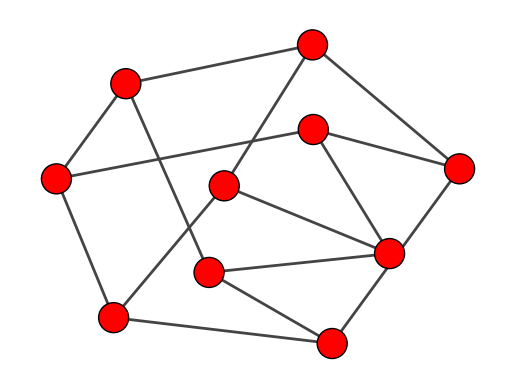

In [3]:
import matplotlib.pyplot as plt
import igraph as ig
ig.config["plotting.backend"] = "matplotlib"
g = ig.Graph.Famous("petersen")
ig.plot(g)
plt.show()

1054 2


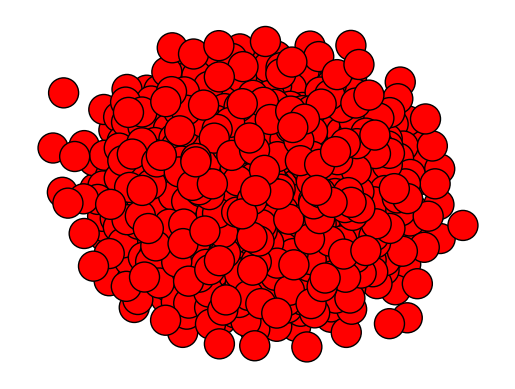

In [5]:
g = Graph.Read_Adjacency('/home/gabridele/Desktop/connectome_sub-100610.csv', sep=',')

vs = VertexSeq(g)

nodes = Graph.vcount(g)
edg = Graph.ecount(g)
print(nodes, edg)

#g = Graph.Watts_Strogatz(dim=1, size=10, nei=10, p=0.3)
plot(g)
plt.show()

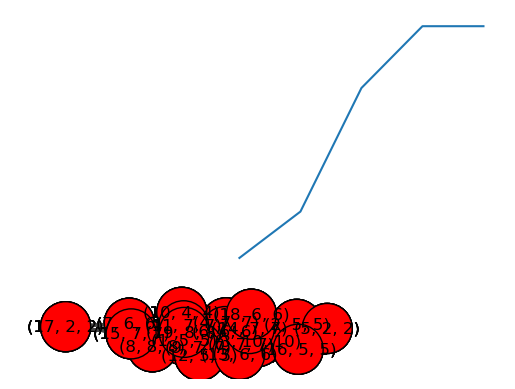

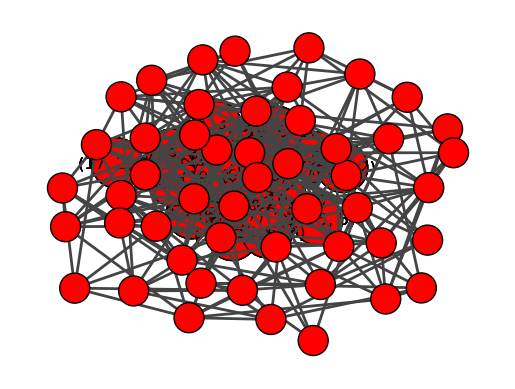

In [10]:
"""
- [x] Przygotować sieć WS z około 20 węzłami
- [ ] Zaimplementować model aktywacji progowej (Linear Threshold)
    - wybieramy z sieci losowo m węzłów
    - zadany jest prób aktywacji, który określa jaki procent węzłów w sąsiedztwie jest wymagany do aktywacji węzła
    - w pierwszym kroku symulacji (t0) aktywizujemy losowo m węzłów (seed set) i oznaczamy je kolorem czerwonym
    - w kolejnych krokach dla każdego węzła sprawdzamy stan sąsiadów i jeśli liczba węzłów aktywnych jest <= n,
    zmieniamy stan węzła na aktywny (kolor czerwony)
    - proces trwa tak długo do momentu gdy nie występują już kolejne aktywacje
    - w każdym kroku zapisujemy do pliku liczbę aktywnych węzłów
    - stany grafu dla sprawdzenia prawidłowości procesu dokuemtnowane na poszczególnych wizualizacjach
"""
from copy import deepcopy
from igraph import *
import random
import numpy as np
import matplotlib.pyplot as plt


def seeding(g, m):
    """
    Random initialization of m nodes in graph g
    :param g: graph
    :param m: number of nodes to activate
    """
    indexes = g.vs.indices
    indexes_to_activate = random.sample(indexes, m)
    g.vs[indexes_to_activate]["activated"] = True


def update_colors(g):
    """
    :param g: graph
    """
    activated_indexes = list(np.where(g.vs["activated"])[0])
    g.vs[activated_indexes]["color"] = "red"


def update_labels(g):
    """
    :param g: graph
    """
    for i in g.vs.indices:
        g.vs[i]["neighbors_activated_count"] = np.sum([g.vs[n]["activated"] for n in g.neighbors(g.vs[i])])
    g.vs["label"] = [(g.vs.indices[i], g.vs[i]["neighbors_activated_count"], g.vs[i]["neighbors_count"]) for i in
                     range(len(g.vs.indices))]


def simulation_step(g, n):
    """
    Perform single iteration. For each node check if percentage of activated neighbors exceed
    threshold defined by n.
    :param g: graph
    :param n: threshold, required ratio of activated neighbors to activate
    """
    has_activation_happened = False
    for i in g.vs.indices:
        if not g.vs[i]["activated"]:
            neighbors_count = g.vs[i]["neighbors_count"]
            if neighbors_count:
                neighbors_activated_count = g.vs[i]["neighbors_activated_count"]
                neighbors_activated_ratio = neighbors_activated_count/neighbors_count
                if neighbors_activated_ratio > n:
                    g.vs[i]["activated"] = True
                    has_activation_happened = True

    update_colors(g)
    update_labels(g)
    activated_nodes_count = np.sum(g.vs["activated"])
    return g, activated_nodes_count, has_activation_happened


def simulation(g, m, n):
    g.vs["activated"] = False
    for i in g.vs.indices:
        g.vs[i]["neighbors_count"] = len(g.neighbors(g.vs[i]))
    g.vs["color"] = "orange"
    g.vs["size"] = 50

    seeding(g, m=m)
    update_colors(g)
    update_labels(g)
    plot(g)

    g_history = [deepcopy(g)]
    activated_nodes_counts = [np.sum(g.vs["activated"])]
    has_activation_happened = True
    while has_activation_happened:
        g, activated_nodes_count, has_activation_happened = simulation_step(g, n)
        g_history.append(deepcopy(g))
        activated_nodes_counts.append(activated_nodes_count)
        plot(g)
    return g_history, activated_nodes_counts


def main():
    g = Graph.Watts_Strogatz(dim=1, size=20, nei=3, p=0.8)
    g_history, activated_nodes_counts = simulation(g, m=5, n=0.3)
    plt.plot(activated_nodes_counts)
    plt.show()

    for g in g_history:
        plot(g)


if __name__ == '__main__':
    main()
    g = Graph.Watts_Strogatz(dim=1, size=50, nei=5, p=0.8)
    plot(g)

In [11]:
print(g_history)
print(activated_nodes_counts)

NameError: name 'g_history' is not defined

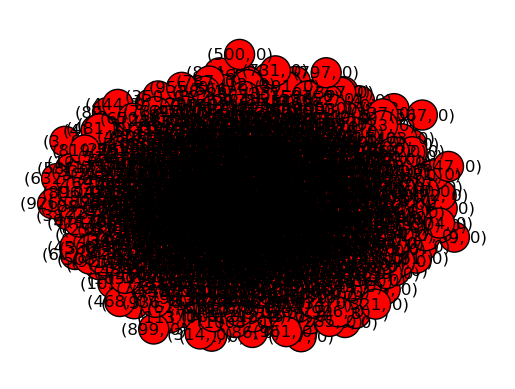

In [16]:
from igraph import *
import random
import numpy as np
import csv

def seeding(g, seeds):
    """
    Initialize the seed nodes in the graph.
    :param g: graph
    :param seeds: list of seed nodes
    """
    g.vs["activated"] = False
    g.vs[seeds[0]]["activated"] = True
    g.vs[seeds[1]]["activated"] = True
    g.vs[seeds[0]]["color"] = "red"
    g.vs[seeds[1]]["color"] = "blue"

def update_labels(g):
    """
    Update node labels with information about activated neighbors count.
    :param g: graph
    """
    for i in g.vs.indices:
        g.vs[i]["neighbors_activated_count"] = sum([g.vs[n]["activated"] for n in g.neighbors(g.vs[i])])
    g.vs["label"] = [(g.vs.indices[i], g.vs[i]["neighbors_activated_count"]) for i in range(len(g.vs.indices))]

def simulation_step(g, threshold):
    """
    Perform a single iteration of the simulation.
    :param g: graph
    :param threshold: activation threshold
    """
    has_activation_happened = False
    for i in g.vs.indices:
        if not g.vs[i]["activated"]:
            neighbors_count = len(g.neighbors(g.vs[i]))
            if neighbors_count:
                neighbors_activated_count = g.vs[i]["neighbors_activated_count"]
                neighbors_activated_ratio = neighbors_activated_count / neighbors_count
                if neighbors_activated_ratio > threshold:
                    g.vs[i]["activated"] = True
                    has_activation_happened = True

    return g, has_activation_happened

def simulation(g, seeds, threshold):
    """
    Perform the simulation.
    :param g: graph
    :param seeds: list of seed nodes
    :param threshold: activation threshold
    """
    seeding(g, seeds)

    g.vs["neighbors_activated_count"] = 0
    update_labels(g)

    g_history = [deepcopy(g)]
    has_activation_happened = True
    while has_activation_happened:
        g, has_activation_happened = simulation_step(g, threshold)
        update_labels(g)
        g_history.append(deepcopy(g))

    return g_history

def adjust_node_size(g):
    """
    Adjust the size of the nodes based on the scaled degree of the nodes.
    :param g: graph
    """
    # Scale the degree values to the range [min_size, max_size]
    min_size = 10
    max_size = 50
    degree_scale = max_size / max(g.degree())
    scaled_degrees = [min_size + degree_scale * degree for degree in g.degree()]

    # Set the node sizes
    g.vs["size"] = scaled_degrees

def main():
    # Read the adjacency matrix from CSV file
    g = Graph.Read_Adjacency('/home/gabridele/Desktop/connectome_sub-100610.csv', sep=',')

    # Define seeds for the competitive scenario
    seeds = [0, 1]  # Adjust as needed

    # Define activation threshold
    threshold = 0.5  # Adjust as needed

    # Perform the simulation
    g_history = simulation(g, seeds, threshold)
    adjust_node_size(g)
    # Visualize the graph history
    for g in g_history:
        plot(g)

if __name__ == '__main__':
    main()


In [15]:
print(seed1)

NameError: name 'seed1' is not defined

# New

In [24]:
import numpy as np
from igraph import *
import random
import matplotlib as plt

1. Load graph data

In [14]:
connectivity_matrix = np.loadtxt('/home/gabridele/Desktop/connectome_sub-100610.csv', delimiter=',')
#too big for computer, reduce by 1/4
cropped_matrix = connectivity_matrix[:connectivity_matrix.shape[0]//4, :connectivity_matrix.shape[1]//4]

#Print the shape and content of the connectivity matrix
print("Connectivity Matrix Shape:", cropped_matrix.shape)
print("Connectivity Matrix Content:")
#print(connectivity_matrix)

# Create a graph from the connectivity matrix with weighted edges
weighted_edges = [(i, j, weight) for i, row in enumerate(cropped_matrix) for j, weight in enumerate(row)]
g = Graph.TupleList(weighted_edges, directed=False, edge_attrs=["weight"])

# Print the list of weighted edges
print("Weighted Edges:")
print(weighted_edges)

Connectivity Matrix Shape: (263, 263)
Connectivity Matrix Content:
Weighted Edges:
[(0, 0, 0.0), (0, 1, 0.135759), (0, 2, 0.122164), (0, 3, 0.215672), (0, 4, 0.16082), (0, 5, 0.113105), (0, 6, 0.00225289), (0, 7, 0.000832639), (0, 8, 0.0), (0, 9, 0.0), (0, 10, 0.00117199), (0, 11, 0.000703235), (0, 12, 0.0), (0, 13, 0.00326052), (0, 14, 0.00145191), (0, 15, 0.00267227), (0, 16, 0.00180234), (0, 17, 0.00208877), (0, 18, 0.0), (0, 19, 0.000719424), (0, 20, 0.000852515), (0, 21, 0.00172414), (0, 22, 0.0), (0, 23, 0.00825688), (0, 24, 0.0727049), (0, 25, 0.00321543), (0, 26, 0.00272387), (0, 27, 0.0), (0, 28, 0.0118632), (0, 29, 0.00275577), (0, 30, 0.0104974), (0, 31, 0.0), (0, 32, 0.00409836), (0, 33, 0.0992648), (0, 34, 0.0680271), (0, 35, 0.190737), (0, 36, 0.174784), (0, 37, 0.0170732), (0, 38, 0.349606), (0, 39, 0.172183), (0, 40, 0.0318492), (0, 41, 0.0626336), (0, 42, 0.014784), (0, 43, 0.0399395), (0, 44, 0.0345769), (0, 45, 0.442817), (0, 46, 0.00981132), (0, 47, 0.118911), (0, 4

2. Define seed nodes

In [16]:
def select_two_random_seed_nodes(graph):
    """
    Select two random seed nodes from the graph and assign different colors to them.
    
    :param graph: igraph Graph object
    :return: List of indices of selected seed nodes
    """
    total_nodes = len(graph.vs)
    if total_nodes < 2:
        raise ValueError("Graph must have at least two nodes to select two random seed nodes.")

    # Generate two unique random indices for seed nodes
    random_seed_indices = random.sample(range(total_nodes), 2)

    # Mark selected nodes as seed nodes and assign colors
    graph.vs["is_seed"] = False  # Reset previous seed node markings
    for i, index in enumerate(random_seed_indices):
        graph.vs[index]["is_seed"] = True
        graph.vs[index]["color"] = ["red", "blue"][i]  # Assign different colors

    return random_seed_indices #, total_nodes

In [17]:
#sanity check
select_two_random_seed_nodes(g)

[118, 22]

3. Define range of activation threshold

In [21]:
def simulate_activation(graph, seed_nodes, num_iterations=100):
    """Simulate activation spreading from two seed nodes."""
    # Initialize activation status for all nodes
    graph.vs["activated"] = False
    # Activate seed nodes
    graph.vs[seed_nodes]["activated"] = True
    
    # Main simulation loop
    for _ in range(num_iterations):
        # Update activation status for each node
        for node in graph.vs:
            if not node["activated"]:
                # Calculate activation threshold based on edge weight
                activation_threshold = graph.es.select(_source=node.index)[0]["weight"]
                # Calculate total activation level of neighbors
                total_activation = sum(1 for neighbor in graph.neighbors(node) if graph.vs[neighbor]["activated"])
                # Activate node if total activation level exceeds threshold
                if total_activation >= activation_threshold:
                    node["activated"] = True

    return graph

In [22]:
def visualize_graph(graph):
    """Visualize the graph with activated nodes highlighted."""
    visual_style = {
        "vertex_color": ["red" if v["activated"] else "gray" for v in graph.vs],
        "vertex_size": 10,
        "edge_color": "black",
        "layout": graph.layout_fruchterman_reingold(),
        "bbox": (800, 800),
        "margin": 50
    }
    plot(graph, **visual_style)

In [28]:
seed_nodes = select_two_random_seed_nodes(g)
g = simulate_activation(g, seed_nodes)
visualize_graph(g)

AttributeError: Plotting not available; please install pycairo or cairocffi

In [27]:
plot(g, edge_width=[edge["weight"] for edge in g.es])

AttributeError: Plotting not available; please install pycairo or cairocffi

In [ ]:
"""def assign_activation_thresholds(graph, min_threshold, max_threshold):
    """
    Assign activation thresholds to each node in the graph.
    
    :param graph: igraph Graph object
    :param min_threshold: Minimum activation threshold
    :param max_threshold: Maximum activation threshold
    """
    for node in graph.vs:
        # Assign a random threshold to each node from the specified range
        node["activation_threshold"] = random.uniform(min_threshold, max_threshold)

# Example usage:
# Load or create the graph
# For example, loading from an adjacency matrix CSV file
# g = Graph.Read_Adjacency('/path/to/adjacency_matrix.csv', sep=',')

# Define the range of activation thresholds
min_threshold = 0
max_threshold = 1"""

4. Simulate activation

In [ ]:
def simulate_activation(graph):
    """
    Simulate activation in the graph based on the Linear Threshold Model (LTM).
    
    :param graph: igraph Graph object
    """
    # Initialize activation states of nodes
    graph.vs["activated"] = False
    
    # Iterate over each node in the graph
    for node in graph.vs:
        # Get the activation threshold of the node
        threshold = node["activation_threshold"]
        
        # Get the neighbors of the node
        neighbors = graph.neighbors(node)
        
        # Calculate the total activation level of the node's neighbors
        total_activation = sum(1 for neighbor_index in neighbors if graph.vs[neighbor_index]["activated"])
        
        # Activate the node if the total activation level exceeds the threshold
        if total_activation >= threshold:
            node["activated"] = True

In [ ]:
def assign_activation_thresholds_with_weights(graph):
    # Assign activation thresholds to nodes based on weighted sum of incoming edges
    for v in graph.vs:
        weighted_sum = sum(graph.es[e].attributes()["weight"] for e in graph.incident(v))
        # Example: Inverse of weighted sum as activation threshold (higher weights => lower thresholds)
        v["activation_threshold"] = 1 / (1 + weighted_sum)

In [ ]:
def update_activation_with_weights(graph):
    # Update node activation states based on weighted sum of activated neighbors
    for v in graph.vs:
        weighted_sum = sum(graph.es[e].attributes()["weight"] for e in graph.incident(v) if graph.vs[graph.es[e].target]["activated"])
        if weighted_sum >= v["activation_threshold"]:
            v["activated"] = True

In [ ]:
#sanity check
simulate_activation(g)

5. Update graph visualization

In [ ]:
def update_graph_visualization(graph):
    """
    Update the graph visualization with customized node colors and sizes representing activation states.
    
    :param graph: igraph Graph object
    """
    # Define colors for activated and non-activated nodes
    activated_color = "red"
    non_activated_color = "blue"
    
    # Define node size
    node_size = 10  # Adjust the size as needed
    
    # Create a list of colors for all nodes based on their activation states
    node_colors = [activated_color if node["activated"] else non_activated_color for node in graph.vs]
    
    # Set the size attribute for all nodes in the graph
    graph.vs["size"] = node_size
    
    # Define edge color
    edge_color = "gray"
    
    # Plot the graph with customized node colors and sizes, and include edges
    plot(graph, bbox=(400, 400), vertex_color=node_colors, edge_color=edge_color)

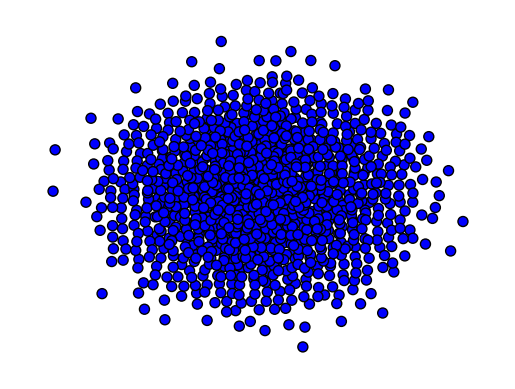

In [ ]:
#sanity check
update_graph_visualization(g)

6. Repeat simulation

In [ ]:
def repeat_simulation(graph, num_iterations):
    """
    Repeat the simulation multiple times and store the results for each iteration.
    
    :param graph: igraph Graph object
    :param num_iterations: Number of iterations to repeat the simulation
    :return: List of activated node counts for each iteration
    """
    activated_counts_list = []
    
    for _ in range(num_iterations):
        # Simulate activation in the graph
        simulate_activation(graph)
        
        # Count the number of activated nodes
        activated_count = sum(1 for node in graph.vs if node["activated"])
        
        # Store the activated node count for this iteration
        activated_counts_list.append(activated_count)
        
        # Reset activation states for the next iteration
        graph.vs["activated"] = False
    
    return activated_counts_list

In [ ]:
#sanity check

# Specify the number of iterations
num_iterations = 20

# Repeat the simulation multiple times and store the results
activated_counts_list = repeat_simulation(g, num_iterations)
print("Activated node counts for each iteration:", activated_counts_list)

Activated node counts for each iteration: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


7. Analyze results

In [ ]:
def analyze_results(activated_counts_list):
    """
    Analyze the results of the simulation by plotting the distribution of activated node counts.
    
    :param activated_counts_list: List of activated node counts for each iteration
    """
    # Plot the distribution of activated node counts
    plt.hist(activated_counts_list, bins=range(min(activated_counts_list), max(activated_counts_list) + 1), align='left')
    plt.xlabel('Activated Node Counts')
    plt.ylabel('Frequency')
    plt.title('Distribution of Activated Node Counts')
    plt.grid(True)
    plt.show()

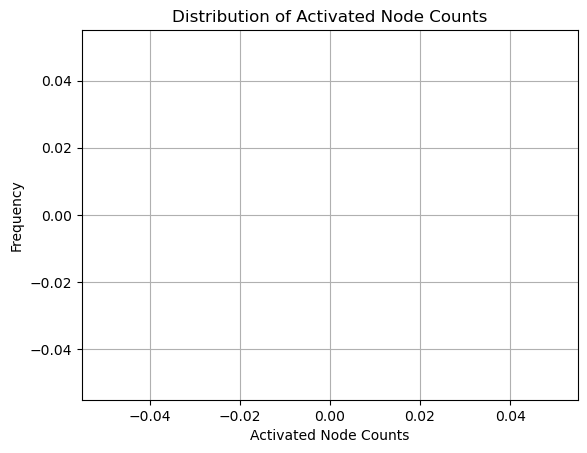

In [ ]:
analyze_results(activated_counts_list)

In [2]:
g = Graph.Read_Adjacency('/home/gabridele/Desktop/connectome_sub-100610.csv', sep=',')

NameError: name 'Graph' is not defined

In [1]:
from igraph import *
import random
import numpy as np
import matplotlib.pyplot as plt

def assign_activation_thresholds_with_weights(graph):
    # Assign activation thresholds to nodes based on weighted sum of incoming edges
    for v in graph.vs:
        weighted_sum = sum(graph.es[e].attributes()["weight"] for e in graph.incident(v))
        # Example: Inverse of weighted sum as activation threshold (higher weights => lower thresholds)
        v["activation_threshold"] = 1 / (1 + weighted_sum)

def update_activation_with_weights(graph):
    # Update node activation states based on weighted sum of activated neighbors
    for v in graph.vs:
        weighted_sum = sum(graph.es[e].attributes()["weight"] for e in graph.incident(v) if graph.vs[graph.es[e].target]["activated"])
        if weighted_sum >= v["activation_threshold"]:
            v["activated"] = True

def seeding(graph, m):
    # Random initialization of m nodes in graph
    indexes = graph.vs.indices
    indexes_to_activate = random.sample(indexes, m)
    graph.vs[indexes_to_activate]["activated"] = True

def update_colors(graph):
    # Update node colors based on activation state
    activated_indexes = list(np.where(graph.vs["activated"])[0])
    graph.vs[activated_indexes]["color"] = "red"

def update_labels(graph):
    # Update node labels for visualization
    for v in graph.vs.indices:
        graph.vs[v]["neighbors_activated_count"] = np.sum([graph.vs[n]["activated"] for n in graph.neighbors(graph.vs[v])])
    graph.vs["label"] = [(graph.vs.indices[v], graph.vs[v]["neighbors_activated_count"], len(graph.neighbors(graph.vs[v]))) for v in range(len(graph.vs.indices))]

def simulation_step(graph):
    # Perform single iteration of activation process
    update_activation_with_weights(graph)
    update_colors(graph)
    update_labels(graph)
    activated_nodes_count = np.sum(graph.vs["activated"])
    return activated_nodes_count

def main():
    # Load graph from adjacency matrix (replace the path with your file location)
    g = Graph.Read_Adjacency('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv', sep=',')

    # Assign activation thresholds based on edge weights
    assign_activation_thresholds_with_weights(g)

    # Visualization setup
    g.vs["color"] = "orange"
    g.vs["size"] = 20

    # Seed activation
    seeding(g, m=5)

    # Simulation loop
    activated_nodes_counts = []
    while True:
        activated_nodes_count = simulation_step(g)
        activated_nodes_counts.append(activated_nodes_count)
        if activated_nodes_count == 0:
            break

    # Plotting
    plt.plot(activated_nodes_counts)
    plt.xlabel("Iterations")
    plt.ylabel("Activated Nodes")
    plt.title("Node Activation Over Iterations")
    plt.show()

    plot(g)

if __name__ == '__main__':
    main()

ImportError: cannot import name 'is_bigraphical' from 'igraph._igraph' (/Users/gabrieledele/miniconda3/envs/all-env/lib/python3.9/site-packages/igraph/_igraph.cpython-39-darwin.so)